# Introduzione

Abbiamo visto come usare np.polyfit() per trovare i coefficienti di una regressione lineare e non-lineare. Vediamo come espandere questi concetti usando anche la libreria SciKit-Learn

In [ ]:
!pip install statsmodels

In [ ]:
# Importo le librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import scipy.stats

In [ ]:
# Importo i dati via pandas
df = pd.read_csv("C:/Users/carus/Documents/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/Advertising.csv")
# dataset didattico molto utilizzato per studiare la regressione lineare

A quali domande possiamo rispondere usando la Regressione Lineare?

1. Esiste una relazione tra il budget totale investito in pubblicità e le vendite effettive?
2. Se questa relazione esiste, quanto è forte? Quanto è rilevante in termini quantitativi? Cioè dato un budget riusciamo a predire con un alto livello di accuratezza quante vendite faremo?
3. Quanto ogni singolo media contribuisce alle vendite?
4. Con quanta accuratezza possiamo quantificare il contributo di ogni media alle vendite?
5. La relazione esistente è lineare o no?
6. E' possibile trovare delle sinergie tra media diversi?

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Relazione features vs output

Precedentemente abbiamo visto la relazione esistente tra la variabile - che abbiamo introdotto noi - "spesa totale"  e le vendite. Adesso vogliamo esplorare la relazione tra ogni singola feature e la variabile di output delle vendite

(0.7822244248616064, 1.467389700194802e-42)

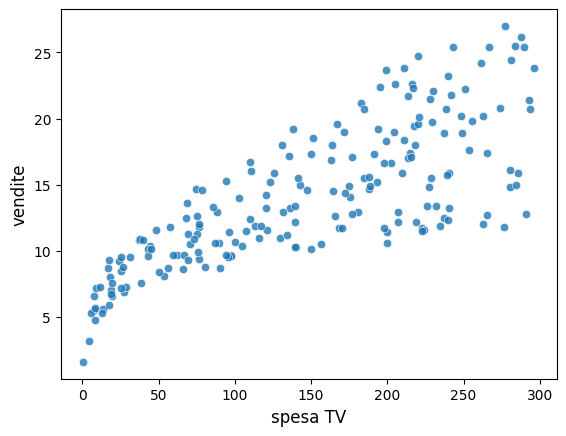

In [ ]:
sns.scatterplot(data = df, x = "TV", y = "sales", alpha = 0.8)
plt.xlabel("spesa TV", fontsize = 12)
plt.ylabel("vendite", fontsize = 12)
scipy.stats.pearsonr(df["TV"], df["sales"])

(0.7822244248616064, 1.467389700194802e-42)

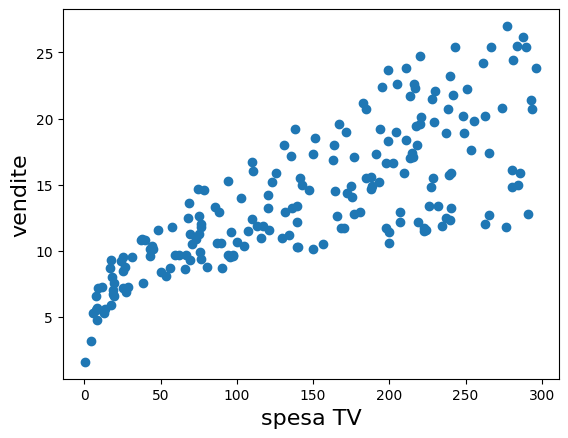

In [ ]:
# spesa TV vs. vendite
plt.figure()
plt.plot(df["TV"], df["sales"], "o")
plt.xlabel("spesa TV", fontsize = 16)
plt.ylabel("vendite", fontsize = 16)
scipy.stats.pearsonr(df["TV"], df["sales"])

(0.5762225745710552, 4.354966001767037e-19)

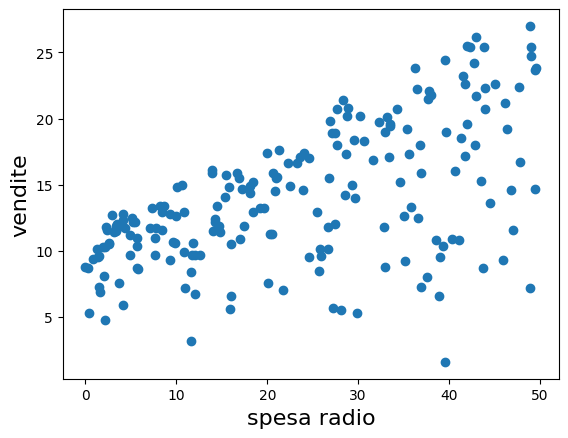

In [ ]:
# spesa radio vs. vendite
plt.figure()
plt.plot(df["radio"], df["sales"], "o")
plt.xlabel("spesa radio", fontsize = 16)
plt.ylabel("vendite", fontsize = 16)
scipy.stats.pearsonr(df["radio"], df["sales"])

(0.22829902637616536, 0.0011481958688882665)

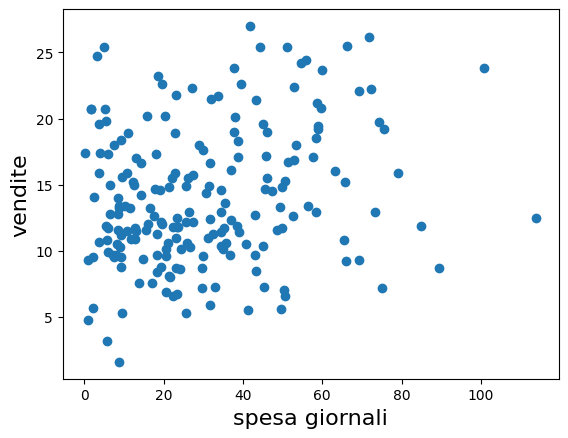

In [ ]:
# spesa giornali vs. vendite
plt.figure()
plt.plot(df["newspaper"], df["sales"], "o")
plt.xlabel("spesa giornali", fontsize = 16)
plt.ylabel("vendite", fontsize = 16)
scipy.stats.pearsonr(df["newspaper"], df["sales"])

Text(0.5, 0, 'spese giornali')

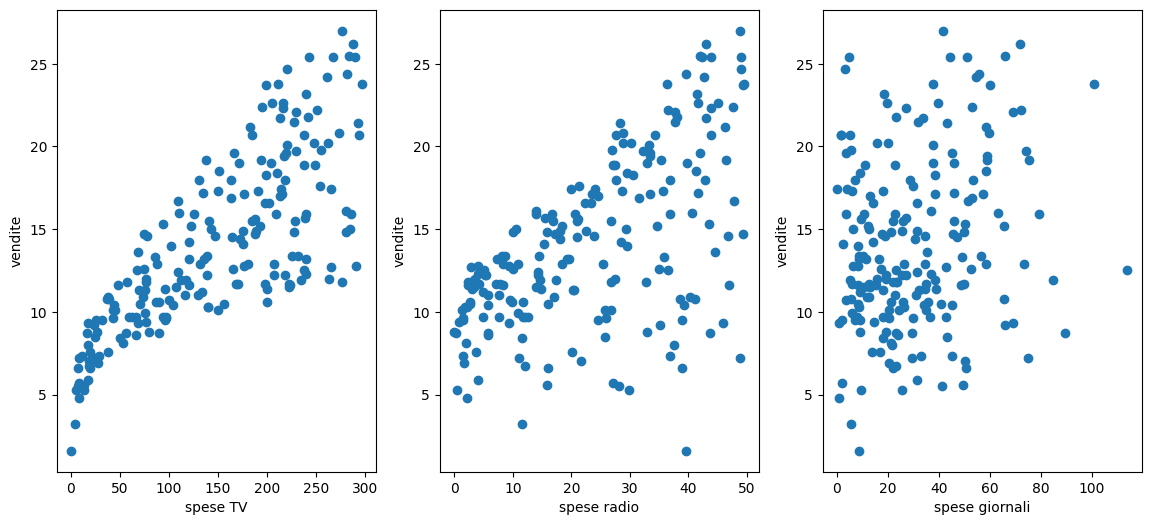

In [ ]:
# confrontiamo i tre plot
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 6))

axes[0].plot(df["TV"], df["sales"], "o")
axes[0].set_ylabel("vendite")
axes[0].set_xlabel("spese TV")

axes[1].plot(df["radio"], df["sales"], "o")
axes[1].set_ylabel("vendite")
axes[1].set_xlabel("spese radio")

axes[2].plot(df["newspaper"], df["sales"], "o")
axes[2].set_ylabel("vendite")
axes[2].set_xlabel("spese giornali")

**Considerazioni**: benché fortemente rumorosa, sembra sussistere una relazione tra le vendite e le spese TV e le spese radio; la relazione tra spese giornali e vendite è invece molto debole.

# Relazione tra le features

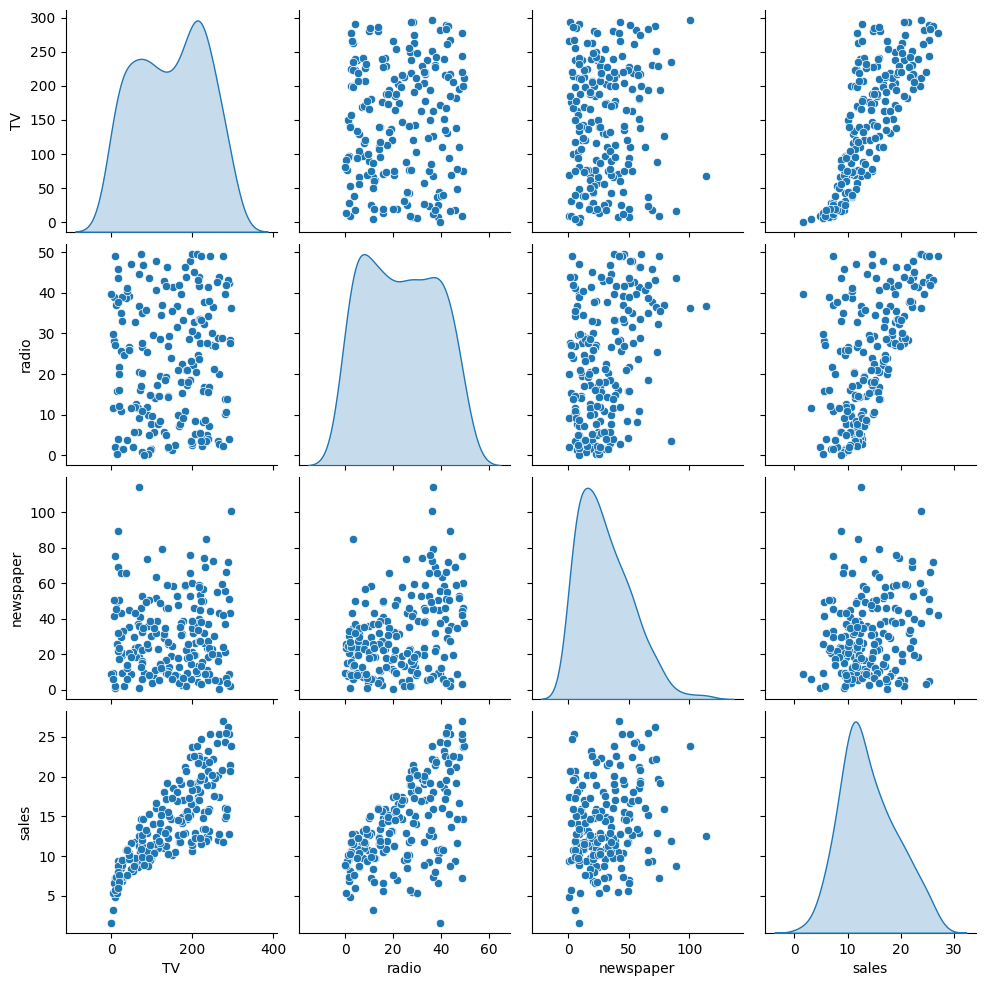

In [ ]:
sns.pairplot(df, diag_kind = "kde")

<AxesSubplot: >

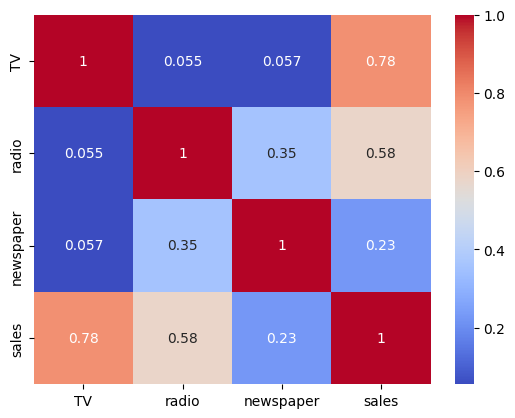

In [ ]:
# visualizzare heatmap correlazione delle features
sns.heatmap(df.corr(), cmap = "coolwarm", annot = True)

# SciKit Learn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# matrice delle features (variabili di input) ottenuta dal dataframe
X = df.drop("sales", axis = 1)

# vettore delle labels (variabili di output) ottenuta dal dataframe
y = df["sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

In [ ]:
# Vediamo come è stato ripartito il dataset in train-test set

# X_train
# X_test
# y_train
# y_test

# Creazione modello lineare

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# è utile chiedere aiuto a Jupiter
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [ ]:
# instanziamo un modello
model = LinearRegression()

Fittiamo il modello sui dati di training

In [ ]:
# l'algoritmo trova i parametri ottimizzati che associano X_train a
# y_train
model.fit(X_train, y_train)

LinearRegression()

Si tratta di un problema di **regressione**, vogliamo quindi una misura quantitativa delle prestazioni del nostro modello.

Dobbiamo quindi introdurre delle metriche che ci indicano **quanto le predizioni del nostro modello siano discrepanti** dai valori di y_test

# Metriche di valutazione

Tutte tali quantità possono essere interpretate come delle **loss function**, poiché il fine delle nostre analisi è spesso quello di minimizzare il valore che queste funzioni assumono sul test set.

Aggiungere la statistica $R^2$

**Mean Absolute Error** (MAE) è la **media dei valori assoluti** degli errori:

$$
\dfrac{1}{n}\sum_{i=1}^{n}|y_i-g(\mathbf{x}_i|\mathbf{\beta})|
$$

**Mean Squared Error** (MSE) è la **media dei quadrati degli errori**: 

$$
\dfrac{1}{n}\sum_{i=1}^{n}(y_i-g(\mathbf{x}_i|\mathbf{\beta}))^{2}
$$

**Root Mean Squared Error** (RMSE) è la **radice quadrata del MSE**:

$$
\sqrt{\dfrac{1}{n}\sum_{i=1}^{n}(y_i-g(\mathbf{x}_i|\mathbf{\beta}))^{2}}
$$

Commenti:


1. **MAE** è intuitivo da comprendere e si può pensare come l'errore assoluto medio che commettiamo;
2. **MSE** utilizzato alternativamente al MAE. Utile nelle applicazioni reali dove è necessario "punire" fortemente gli errori maggiori in valore assoluto;
3. **RMSE** e utilizzato in tandem con il MSE, poiché il RMSE è direttamente espresso nelle stesse unità/dimensioni fisiche delle labels y.

# $R^2$ Statistics

Definiamo il **Residual Sum of Squares** (RSS) come:

$$
RSS \equiv  \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

Questa quantità misura la variabilità nella variabile di risposta $y$ in relazione al fit che abbiamo eseguito - notare che è la somma dei quadrati dei residui.

Definiamo la **Total Sum of Squares** (TSS) come:

$$
TSS \equiv \sum_{i=1}^{n}(y_i - \bar{y}_i)^2
$$

Questa quantità misura la variabilità **intrinseca** dei dati - notare che è la misura di quanto le istanze della variabile di risposta $y$ siano disperse attorno la media $\bar{y} = (1/n)\sum_{i=1}^n y_i$
 
la statistica $R^2$ si definisce come:

$$
R^2 = 1 - \frac{RSS}{TSS}, \quad R^2 \in [0, 1] 
$$

Quindi:
$R^2$ vicino a $1$ indica che il fit gran parte della variabilità osservata può essere attribuita alla relazione lineare - di cui abbiamo stimato i parametri - tra le variabili esplicative $\mathbf{x}$ e la variabile di risposta $y$;
al contratio un $R^2$ vicino a $0$ indica che il nostro fit è di cattiva qualità e la variabilità osservata non può essere spiegata per mezzo di una relazione lineare tra le variabili esplicative $\mathbf{x}$ e la variabile di risposta $y$.

**Significato**: 
1. $R^2$ misura la porzione di variabilità nella riposta $y$ che è possibile spiegare tramite il fit lineare che associa le variabili esplicative $\mathbf{x}$ alla risposta stessa $y$
2. $R^2$ è una misura della relazione lineare che sussiste tra $y$ e le variabili esplicative $\mathbf{x}$ e generalizza la correlazione lineare $\mbox{Cor}(x,y)$ al caso in cui $\mathbf{x}$ sia multidimensionale.

**Vantaggi**: 
1. rispetto alle metriche viste sopra, che sono tutte espresse nelle unità della variabile di output, $R^2$ è un numero puro.

# Performance del Modello

In [ ]:
predizioni_test = model.predict(X_test)

In [ ]:
#predizioni_test

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
MAE = mean_absolute_error(y_test, predizioni_test)
MSE = mean_squared_error(y_test, predizioni_test)
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, predizioni_test)               

In [ ]:
MAE

1.1673006147938452

In [ ]:
MSE

2.3935864008187617

In [ ]:
RMSE

1.547121973478097

In [ ]:
R_squared

0.9144692690504648

Quando queste metriche siano "buone" dipende da quanto esse siano accettabili per il progetto che vogliamo portare a termine. Pertanto non esistono metriche buone in assoluto (mentre esistono sicuramente metriche cattive in assoluto), ma solo relativamente agli obiettivi di progetto

# Studio residui

Per capire se la regressione lineare fosse davvero un modello valido per studiare i dati a diposizione dobbiamo studiare i **residui**, cioè le singole quantità:

$$
r_i = (y_i-g(\mathbf{x}_i|\mathbf{\beta}))
$$

Come si vede dalla formula, i residui sono la differenza tra il valore **osservato** dal dataset e il valore **stimato** attraverso la formula di regressione.

DIRE CHE SE IL MODELLO DI REGRESSIONE LINEARE FITTA BENE I DATI, ALLORA I RESIDUI NON DEVONO MOSTRARE NESSUN PATTERN EVIDENTE



In [ ]:
# predizioni con il modello fittato ai dati
predizioni_test = model.predict(X_test)

# calcolo residui
residui_test = y_test - predizioni_test

(0.09959869815886058, 0.4913455598970801)

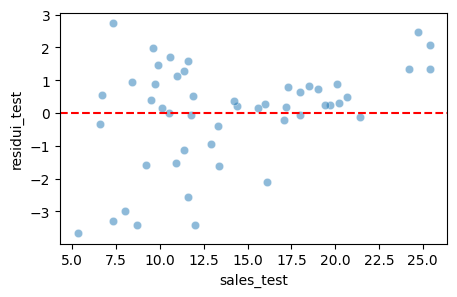

In [ ]:
# visualizzazione residui in funzione di y_test
plt.figure(figsize = (5, 3), dpi = 100)
sns.scatterplot(x = y_test, y = residui_test, alpha = 0.5);
plt.axhline(y = 0, color = "r", linestyle = "--");
plt.xlabel("sales_test");
plt.ylabel("residui_test");
scipy.stats.pearsonr(predizioni_test, residui_test)

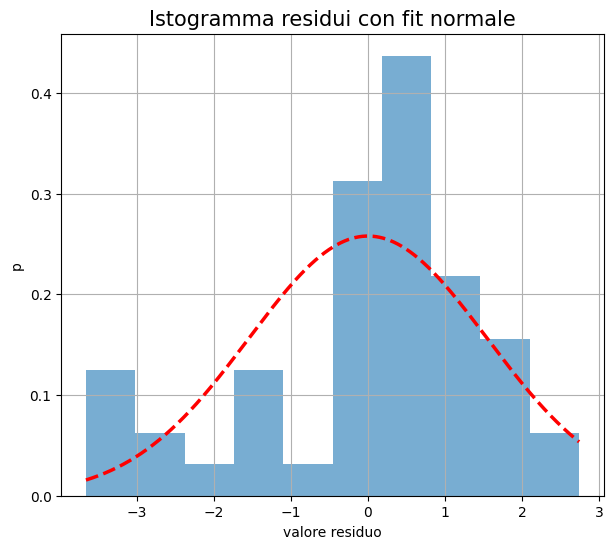

In [ ]:
shape, loc = scipy.stats.norm.fit(residui_test, floc = 0)
fit_normale_residui = scipy.stats.norm(shape, loc)

plt.figure(figsize = (7, 6), dpi = 100)
plt.hist(residui_test, density = True, alpha = 0.6, bins = 10);
plt.grid(True)

supporto = np.linspace(residui_test.min(), residui_test.max(), 1000)
plt.plot(supporto, fit_normale_residui.pdf(supporto), "r--", lw = 2.5)

plt.xlabel("valore residuo");
plt.ylabel("p");
plt.title("Istogramma residui con fit normale", fontsize = 15);

Sono effettivamente distribuiti in maniera normale? E' difficile da dire guardando solo questo plot. 
Si usa pertanto un **normal probability plot**.

In [ ]:
# importo la libreria python per il calcolo scientifico
# import scipy as sp

KstestResult(statistic=0.17141841306413613, pvalue=0.09379427201847146)

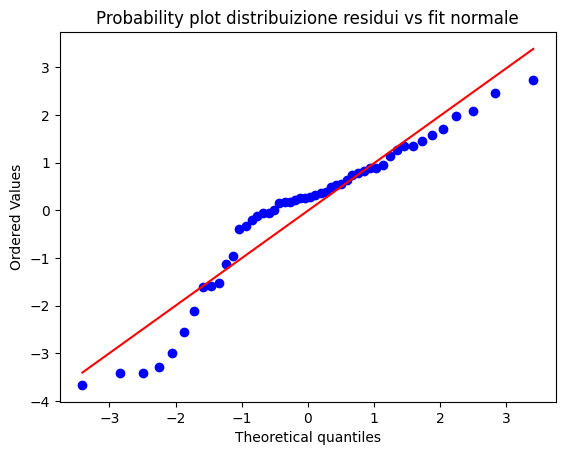

In [ ]:
scipy.stats.probplot(residui_test, dist = fit_normale_residui, plot = plt.figure().add_subplot(111))
plt.title("Probability plot distribuizione residui vs fit normale")
# Kolmogorov-Sminrov test
scipy.stats.kstest(residui_test, "norm", (shape, loc))

Il normal probability plot è un caso speciale del Q-Q probability plot per una distribuzione normale.
Tale grafico che permette di individuare deviazioni dalla distribuzione normale. Quindi serve a identificare outliers, asimmetrie, curtosi, trasformazioni etc.
 
Si possono considerare normal probability plot costruiti a partire da dati grezzi, da residui relativi ai modelli che abbiamo fittato (come in questo caso) oppure da parametri che stiamo cercando di stimare. 

Più i dati si dispongono lungo una linea retta, più sono distribuiti secondo la distribuzione normale.

# Riallenare il modello 

Ammettiamo di essere soddisfatti con le prestazioni del modello sui dati di test, e siamo quindi pronti a deployare (impiegare) il modello. 

In [ ]:
# Rialleniamo un modello di regressione lineare su tutto il dataset
modello_finale = LinearRegression()
modello_finale.fit(X, y)

LinearRegression()

In [ ]:
# Vediamo che tipo di predizioni produce il nuovo modello allenato s
# sulla totalità dei dati
y_finali = modello_finale.predict(X)

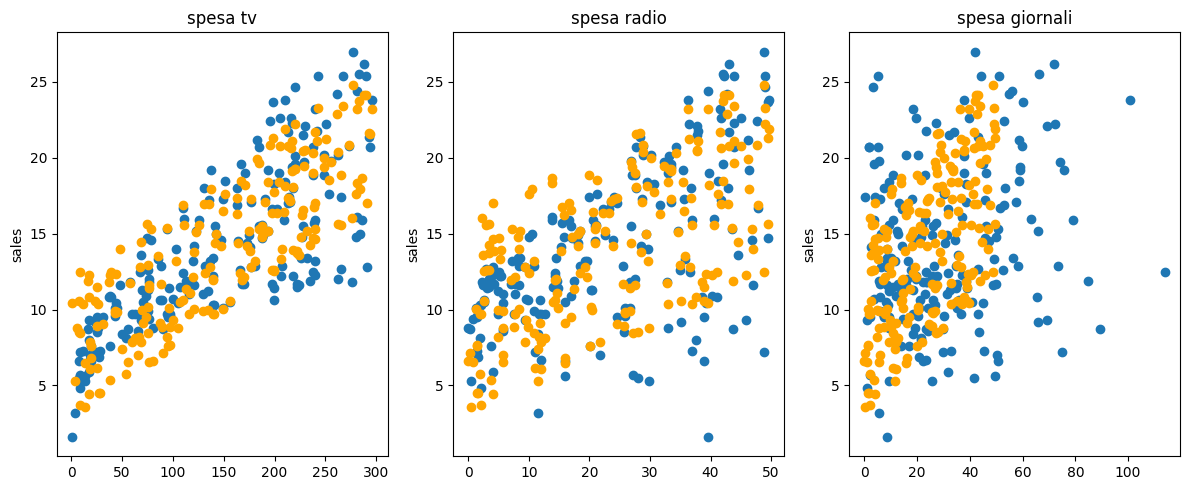

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12,5))

axes[0].plot(df["TV"], df["sales"], "o")
axes[0].plot(df["TV"], y_finali, "o", color = "orange")
axes[0].set_ylabel("sales")
axes[0].set_title("spesa tv")

axes[1].plot(df["radio"], df["sales"], "o")
axes[1].plot(df["radio"], y_finali, "o", color = "orange")
axes[1].set_ylabel("sales")
axes[1].set_title("spesa radio")

axes[2].plot(df["newspaper"], df["sales"], "o")
axes[2].plot(df["radio"], y_finali, "o", color = "orange")
axes[2].set_ylabel("sales")
axes[2].set_title("spesa giornali")

plt.tight_layout();

**Commento**. Si vede come il nostro modello riproduce dei dati simili a quelli originali, forse con una piccola eccezione sulla spesa dei giornali.

# Residui

In [ ]:
# definiamo e visualizziamo i residui del modello fittato sulla 
# totalità dei dati
residui = y - y_finali

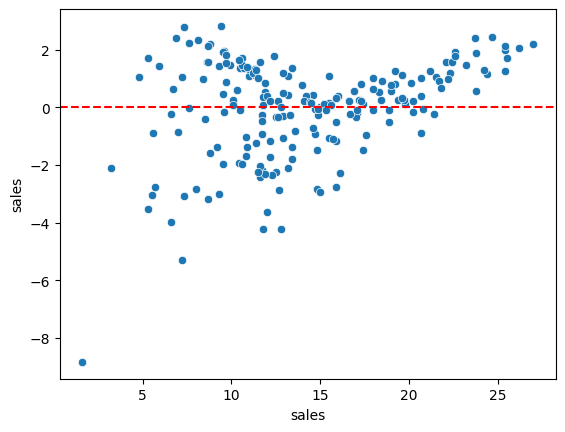

In [ ]:
sns.scatterplot(x = y, y = residui)
plt.axhline(y = 0, color = "r", linestyle = "--")

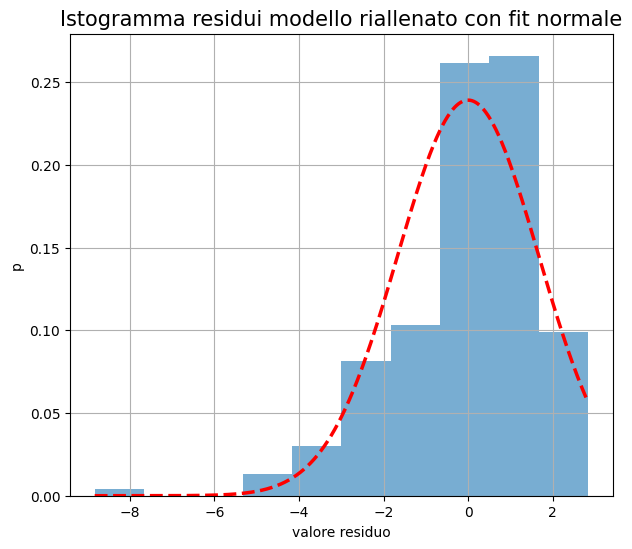

In [ ]:
shape, loc = scipy.stats.norm.fit(residui, floc = 0)
fit_normale_residui = scipy.stats.norm(shape, loc)

plt.figure(figsize = (7, 6), dpi = 100)
plt.hist(residui, density = True, alpha = 0.6, bins = 10);
plt.grid(True)

supporto = np.linspace(residui.min(), residui.max()+5, 1000)
plt.plot(supporto, fit_normale_residui.pdf(supporto), "r--", lw = 2.5)

plt.xlabel("valore residuo");
plt.ylabel("p");
plt.title("Istogramma residui modello riallenato con fit normale", fontsize = 15);

KstestResult(statistic=0.13177221966119557, pvalue=0.001729440829378216)

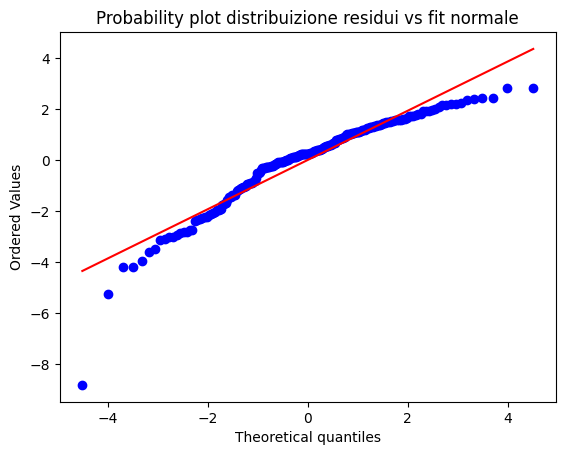

In [ ]:
scipy.stats.probplot(residui, dist = fit_normale_residui, plot = plt.figure().add_subplot(111))
plt.title("Probability plot distribuizione residui vs fit normale")
# Kolmogorov-Sminrov test
scipy.stats.kstest(residui, "norm", (shape, loc))

# Interpretazione coefficienti

fare anche un discorso su $R_0$ e il coefficiente di correlazione di Pearson

Ricordiamo che abbiamo allenato un modello di regressione lineare che ha la seguente forma:

$$
\hat{y}_i = \beta_0 + x_{1i}\beta_1 + x_{2i}\beta_2 + x_{3i}\beta_3
$$

Scikit-learn permette di visualizzare i coefficienti $\beta_i$ con $i = 1, 2, ...$

In [ ]:
# visualizzazione coefficienti regressione lineare
modello_finale.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
# dataframe canale di pubblicità vs. coefficienti regressione lineare
df_coefficienti = pd.DataFrame(modello_finale.coef_, X.columns, 
                              columns = ["Coefficient"])
df_coefficienti

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


Questo vuol dire che, tenendo costanti tutte le altre features, a un aumento di una unità (= 1000 dollari) nella feature $x_i$ corrisponderà, in media, un aumento di $\beta_i$ unità (= 1000 pezzi venduti) nella $y$

Esempio: per ogni 1000 dollari spesi in più in in pubblicità televisive, avremo in media 45 pezzi venduti in più.

# Predizione

Proviamo quindi a usare il modello allenato su tutti i dati per produrre delle predizioni.

In [ ]:
# Spendiamo 200k in pubblicità TV, 120k in radio e 5k nei giornali
prova = [[200, 120, 5]]
modello_finale.predict(prova)

C:\Users\carus\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34.71023303])

Questa è una predizione vera e propria e non c'è modo di sapere quanto essa si accurata se non testandola direttamente

# Significatività modello


Vogliamo sapere quanto affidabile sia il modello ottenuto tramite Regressione Lineare. Per fare ciò, l'approccio più diretto consiste nel calcolo dell'errore standard $\mbox{SE}(\hat{\beta}_i)$ di ogni coefficiente $\hat{\beta}_i$. 

Per la Regressione Lineare, l'intervallo di confidenza al 95% per il generico coefficiente $\hat{\beta}_i$, prende la forma:

$$
\hat{\beta}_i \pm 2 \cdot \mbox{SE}(\hat{\beta}_i)
$$

Cioè la probabilità che il coefficiente vero $\beta_i$ si trovi nell'intervallo di confidenza è pari al 95%.


Purtroppo Scikit-Learn non è equipaggiata con le opportune funzioni per calcolare l'errore standard nel caso di Regressioni Lineari multidimensionali, quindi dobbiamo ricorrere alla libreria statsmodels.

In [ ]:
import statsmodels.api as sm
ols = sm.OLS(y, X)
ols_result = ols.fit()
ols_result.summary()

NameError: ignored